## Matriz de Confusión:

Muestra los verdaderos positivos (TP), falsos positivos (FP), falsos negativos (FN) y verdaderos negativos (TN) para cada clase.

Ejemplo para "coffee":

TP = 3 (predijo "coffee" correctamente 3 veces).

FP = 2 (predijo "coffee" cuando era "tea" 2 veces).

FN = 1 (no predijo "coffee" cuando sí era "coffee" 1 vez).

## Precisión (Precision):

Porcentaje de predicciones correctas para una clase entre todas las predicciones de esa clase.

Fórmula: Precision = TP / (TP + FP).

Para "coffee": 3 / (3 + 2) = 0.60.

## Sensibilidad (Recall):

Porcentaje de casos positivos correctamente identificados.

Fórmula: Recall = TP / (TP + FN).

Para "coffee": 3 / (3 + 1) = 0.75.

## F1-Score:

Media armónica entre precisión y recall. Útil cuando hay desbalance de clases.

Fórmula: F1 = 2 * (Precision * Recall) / (Precision + Recall).

Para "coffee": 2 * (0.60 * 0.75) / (0.60 + 0.75) ≈ 0.67.

### **1. Interpretación del F1-Score**
El **F1-Score** es la **media armónica** entre Precisión y Recall (rango: 0 a 1):  
\[
F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
\]  

| **Valor de F1-Score** | **Interpretación**                              |
|-----------------------|-----------------------------------------------|
| **Alto (cercano a 1)** | Modelo equilibrado: buen balance entre Precisión y Recall. |
| **Medio (~0.5)**       | Desempeño moderado: trade-off evidente entre métricas. |
| **Bajo (cercano a 0)** | Modelo ineficaz: muchos FP o FN (o ambos).     |


## Exactitud (Accuracy):

Porcentaje total de predicciones correctas.

Fórmula: Accuracy = (TP + TN) / Total.

Aquí: (3 + 1 + 2) / 9 ≈ 0.67.

## F1-Score (Why Media armónica entre precisión y recall. Útil cuando hay desbalance de clases):

El F1-Score es la media armónica (no la media simple) entre Precisión y Recall. Esto se debe a una razón clave:

1. La media armónica penaliza valores extremos
Si una de las métricas (Precisión o Recall) es muy baja, el F1-Score se reduce drásticamente.

Esto obliga al modelo a equilibrar ambas métricas, evitando optimizar solo una a costa de la otra.

Ejemplo:

Caso 1: Precisión = 1.0, Recall = 0.1 → Media aritmética = 0.55, pero F1 = 0.18.

Caso 2: Precisión = 0.5, Recall = 0.5 → Media aritmética = 0.5, y F1 = 0.5.

La media armónica "castiga" el desbalance extremo del Caso 1, lo que lo hace más útil para evaluar modelos.





In [3]:
from sklearn.metrics import classification_report, confusion_matrix

# Datos reales y predicciones
y_test = ["coffee", "tea", "water", "water", "coffee", "coffee", "tea", "coffee", "tea"]
y_pred = ["coffee", "coffee", "water", "water", "coffee", "water", "coffee", "coffee", "tea"]

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred, labels=["coffee", "tea", "water"]))

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=["coffee", "tea", "water"]))

Matriz de Confusión:
[[3 0 1]
 [2 1 0]
 [0 0 2]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      coffee       0.60      0.75      0.67         4
         tea       1.00      0.33      0.50         3
       water       0.67      1.00      0.80         2

    accuracy                           0.67         9
   macro avg       0.76      0.69      0.66         9
weighted avg       0.75      0.67      0.64         9



# Matriz de confusion

La matriz de confusión muestra cómo se comparan las etiquetas reales (y_test) con las predicciones del modelo (y_pred). En este caso, hay 3 clases: "coffee", "tea" y "water".

                 Predicciones 
                 coffee  tea  water
Reales  coffee  [[3,    0,    1],
          tea    [2,    1,    0],
          water  [0,    0,    2] ]


Estructura de la Matriz
Cada fila representa la clase real, y cada columna representa la clase predicha. El orden de las clases es:

Primera fila/columna: "coffee"

Segunda fila/columna: "tea"

Tercera fila/columna: "water"


### Análisis Detallado
Clase "coffee" (Fila 1)

3 casos fueron correctamente predichos como "coffee" (Verdaderos Positivos, TP).

0 casos fueron incorrectamente predichos como "tea" (Falsos Positivos para "tea").

1 caso fue incorrectamente predicho como "water" (Falso Negativo para "coffee").

Interpretación:

El modelo identifica bien el "coffee" (3 aciertos), pero confunde 1 caso con "water".

Clase "tea" (Fila 2)

2 casos fueron incorrectamente predichos como "coffee" (Falsos Positivos para "coffee").

1 caso fue correctamente predicho como "tea" (Verdadero Positivo, TP).

0 casos fueron predichos como "water".

Interpretación:

El modelo tiene dificultad para distinguir "tea" de "coffee" (2 errores).

Solo 1 de 3 casos de "tea" fue correctamente identificado (Recall bajo = 0.33).

Clase "water" (Fila 3)

0 casos fueron predichos como "coffee" o "tea" (ningún error).

2 casos fueron correctamente predichos como "water" (Verdaderos Positivos, TP).

Interpretación:

El modelo es perfecto para "water" (ningún error, Recall = 1.0).

### 📊 Explicación de `macro avg` vs `weighted avg`

Estas métricas resumen el rendimiento del modelo en todas las clases, pero con enfoques distintos:

---

#### 1. **Macro Promedio (`macro avg`)**
- **Qué hace**:  
  Calcula la media **no ponderada** de las métricas (Precisión, Recall, F1) en todas las clases.  
- **Fórmula**:  
  - Precisión: `(0.60 (coffee) + 1.00 (tea) + 0.67 (water)) / 3 = 0.76`  
  - Recall: `(0.75 + 0.33 + 1.00) / 3 = 0.69`  
- **Interpretación**:  
  - Trata todas las clases por igual, sin importar su frecuencia.  
  - Ideal cuando **todas las clases son igual de importantes** (ej: diagnóstico de enfermedades raras).  

**En tus datos**:  
El alto `macro avg` en Precisión (0.76) se debe a que `tea` (1.0) y `water` (0.67) compensan el bajo rendimiento de `coffee` (0.60).

---

#### 2. **Promedio Ponderado (`weighted avg`)**
- **Qué hace**:  
  Calcula la media **ponderada por el número de muestras** (`support`) en cada clase.  
- **Fórmula**:  
  - Precisión: `(0.60×4 + 1.00×3 + 0.67×2) / 9 = 0.75`  
  - Recall: `(0.75×4 + 0.33×3 + 1.00×2) / 9 = 0.67`  
- **Interpretación**:  
  - Da más peso a las clases con más muestras.  
  - Útil cuando el **desbalance de clases refleja su importancia real** (ej: detección de spam).  

**En tus datos**:  
`weighted avg` es menor que `macro avg` porque `coffee` (4 muestras) domina el cálculo, y su Recall no es óptimo.

## 📌 ¿Cuándo usar cada una?

| **Tipo**          | **Recomendación**                                                                 |
|-------------------|-----------------------------------------------------------------------------------|
| `macro avg`       | Usar si todas las clases son igual de relevantes (ej: enfermedades raras vs comunes). |
| `weighted avg`    | Usar si las clases mayoritarias son más importantes (ej: clasificación de productos populares). |

---

Cuando los falsos negativos realmente importan, cuando relamente necesitas minimizar falsos Negativos y un falso negativo es mas costoso que un falso positivo (Podria ser un Cancer dectection), ¿Que usarias, precision  or recall?.

La respuesta es Recall, ya queremos favorecer los casos positivos.

Cuando false positivos son realmete costosos y preferimos dar accidentalmente un reultado negatiivo es cuando usamos precision.

# **Precisión vs. Recall: ¿Cuándo usar cada métrica?**

## **1. Recall (Exhaustividad)**
### **Definición**
Mide la capacidad del modelo para detectar **todos los casos positivos**.  
Fórmula:  
\[
\text{Recall} = \frac{VP}{VP + FN}
\]  
*(VP: Verdaderos Positivos, FN: Falsos Negativos)*

### **¿Cuándo usarlo?**  
✅ Cuando **los falsos negativos son inaceptables** (ej: diagnóstico de enfermedades graves).  
✅ El costo de **no detectar un positivo** es mayor que el de falsas alarmas.

### **Ejemplos**  
- 🏥 **Detección de cáncer:** Mejor sobrediagnosticar (FP) que dejar pasar un caso real (FN).  
- 🛡️ **Detección de fraudes:** Preferir bloquear transacciones sospechosas (FP) que permitir un fraude (FN).

---

## **2. Precisión (Exactitud)**
### **Definición**
Mide **cuántos de los predichos como positivos son realmente positivos**.  
Fórmula:  
\[
\text{Precisión} = \frac{VP}{VP + FP}
\]  
*(FP: Falsos Positivos)*

### **¿Cuándo usarla?**  
✅ Cuando **los falsos positivos son críticos** (ej: correos marcados como spam).  
✅ El costo de **alertas incorrectas** es alto (tiempo, dinero, molestia).

### **Ejemplos**  
- 📧 **Filtrado de spam:** Mejor dejar pasar spam (FN) que enviar un correo importante a spam (FP).  
- 🚔 **Liberación condicional:** Preferir no liberar a un peligroso (FN) que liberar por error (FP).

---

## **3. Comparativa rápida**
| **Situación**                     | **Métrica prioritaria** | **Razón**                                  |
|-----------------------------------|-------------------------|--------------------------------------------|
| "No puedo permitir falsos negativos" | **Recall**             | Minimizar casos peligrosos no detectados. |
| "Los falsos positivos son costosos" | **Precisión**          | Evitar acciones innecesarias o errores caros. |

## **4. ¿Y si necesitas ambas?**  
Usa el **F1-Score** (media armónica de Precisión y Recall):  
\[
F1 = 2 \times \frac{\text{Precisión} \times \text{Recall}}{\text{Precisión} + \text{Recall}}
\]  
**Ejemplo:** Clasificación de documentos legales donde tanto FP como FN son críticos.

---

**Conclusión clave:**  
- **Recall = "No dejar escapar positivos"** (seguridad, salud).  
- **Precisión = "No equivocarse al marcar positivos"** (spam, decisiones costosas).  




# Hitmap

Heatmap vs. Matriz de Confusión: Análisis Comparativo
Teoría: ¿Por qué usar un heatmap?
Un heatmap es particularmente útil cuando:

Tenemos múltiples clases (no solo binario) y la matriz de confusión se vuelve compleja de leer

Queremos identificar patrones visuales en los errores del modelo

Necesitamos comparar múltiples modelos o configuraciones

La principal ventaja sobre la matriz de confusión tradicional es que:

Los colores gradientes permiten detectar rápidamente las áreas problemáticas

Es más intuitivo para comunicar resultados a audiencias no técnicas

Permite visualizar matrices normalizadas de manera más efectiva

Caso apropiado: Clasificación multiclase
Imaginemos un clasificador de imágenes que distingue entre 5 tipos de flores:

Rosa

Margarita

Tulipán

Girasol

Orquídea

En este caso, una matriz de confusión de 5x5 puede ser difícil de interpretar, mientras que un heatmap nos permite ver claramente qué clases se confunden entre sí.

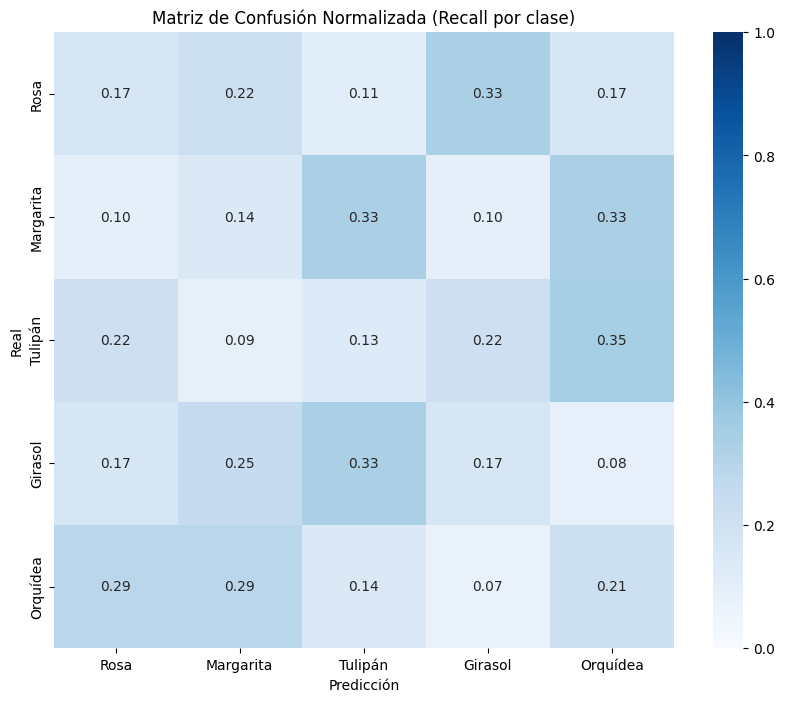

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Datos de ejemplo (reemplazar con tus datos reales)
y_true = np.random.randint(0, 5, size=100)  # Clases reales
y_pred = np.random.randint(0, 5, size=100)  # Predicciones del modelo

# Nombres de las clases
classes = ['Rosa', 'Margarita', 'Tulipán', 'Girasol', 'Orquídea']

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Normalizar por filas (para ver recall por clase)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt=".2f", 
            cmap="Blues",
            xticklabels=classes,
            yticklabels=classes,
            vmin=0, vmax=1)

plt.title('Matriz de Confusión Normalizada (Recall por clase)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Interpretación del heatmap
Diagonal principal: Muestra el porcentaje de predicciones correctas para cada clase (como recall)

Valores cercanos a 1 (azul oscuro) indican buen desempeño

Valores cercanos a 0 (azul claro/blanco) indican problemas

Fuera de la diagonal: Muestra confusiones entre clases

Un cuadro oscuro en (Margarita, Rosa) indica que a menudo se confunden

Patrones visuales:

Filas con mucho color: la clase tiene muchos errores

Columnas con mucho color: el modelo tiende a sobrepredecir esa clase

¿Cuándo preferir heatmap sobre matriz numérica?
Presentaciones a stakeholders: El heatmap comunica mejor los resultados

Análisis exploratorio: Para identificar rápidamente problemas en el modelo

Comparación de modelos: Superponer heatmaps de diferentes modelos

Limitaciones
Pérdida de valores absolutos: El heatmap normalizado oculta el número real de muestras

Dependencia de la paleta de colores: Una mala elección puede dificultar la interpretación

Consejos para mejores visualizaciones
Normalizar adecuadamente:

Por filas (recall)

Por columnas (precisión)

Por el total (distribución conjunta)

Elegir una paleta de colores:

Secuencial (Blues, Greens) para matrices no normalizadas

Divergente (RdBu, coolwarm) para matrices de diferencia entre modelos

Incluir el valor numérico en cada celda (como en el ejemplo) para precisión